# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Feb-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer and do not have epilepsy.

#### Report 3 - focus on the demographics of the research population; d. focus on Region

In [1]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

# set month for covid reference line
covid = ("2022-03-01")

# set position for covid text
pos_text_covid = ("2022-02-01")

# set month for chart labels
pos_chart_labels = ("2022-09-01")

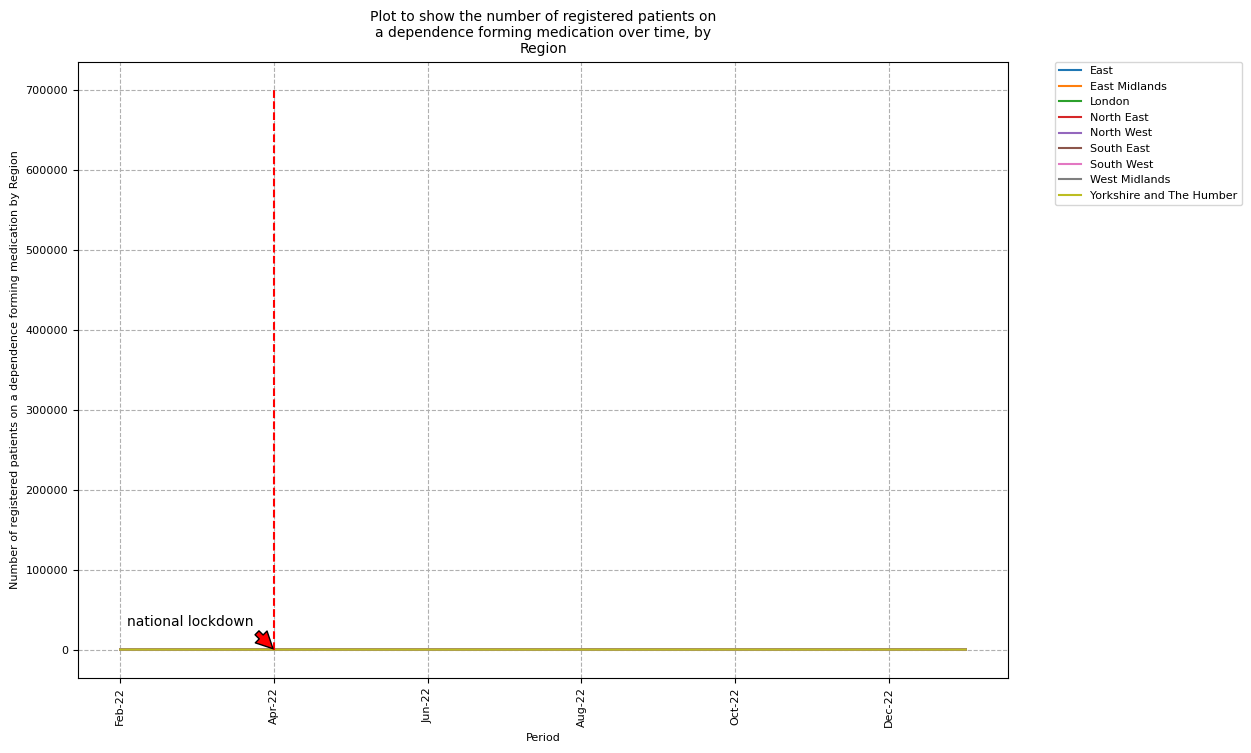

In [2]:
data_measure_dfm_medications_region_rate = pd.read_csv("../output/measure_dfm_medications_by_region_rate.csv", parse_dates=["date"])
data_measure_dfm_medications_region_rate = data_measure_dfm_medications_region_rate.loc[data_measure_dfm_medications_region_rate["region"] != "nan", :]
df_measure_dfm_medications_region_rate = pd.DataFrame.pivot(data_measure_dfm_medications_region_rate, index='date', columns='region', values='research_population')
df_measure_dfm_medications_region_rate.index = pd.to_datetime(df_measure_dfm_medications_region_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_region_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=700000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [3]:
print(tabulate(df_measure_dfm_medications_region_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_region_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22     188              173       443           187           198           193           191              216                         211
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23     192              209       382           213           193           201           213              197                         200


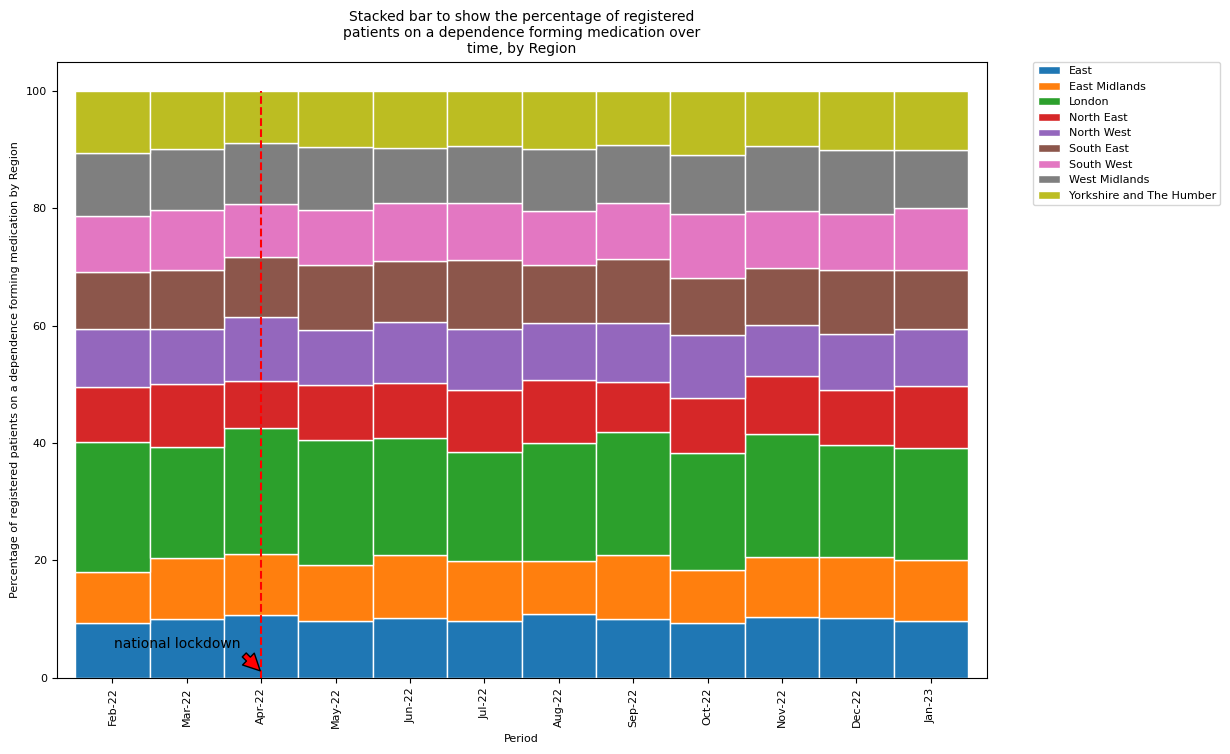

In [4]:
df_region_stacked = pd.DataFrame(df_measure_dfm_medications_region_rate)
df_region_stacked.head()
totrm = df_region_stacked.sum(axis=1)
perrm = df_region_stacked.div(totrm, axis=0).mul(100).round(2)
ax = perrm.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [5]:
print(tabulate(perrm.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrm.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22     9.4             8.65     22.15          9.35           9.9          9.65          9.55             10.8                       10.55
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23     9.6            10.45      19.1         10.65          9.65         10.05         10.65             9.85                          10


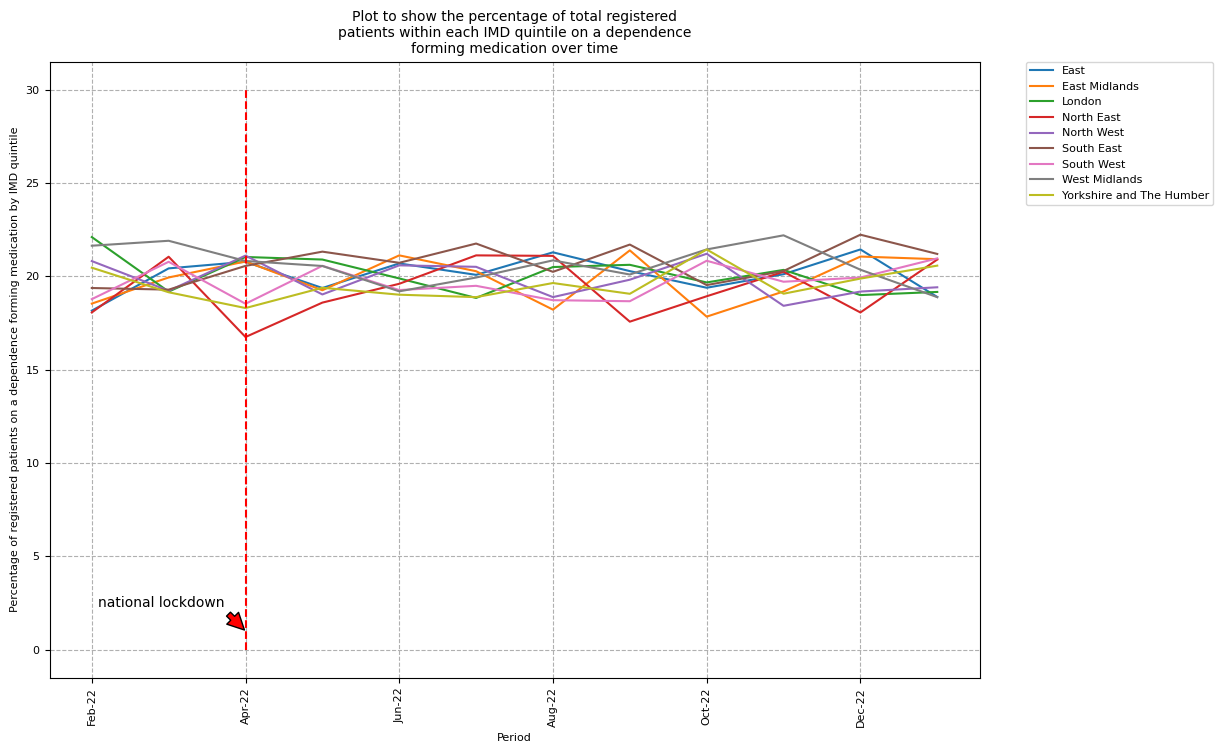

In [6]:
data_measure_dfm_medications_region_rate['value'] = 100 * data_measure_dfm_medications_region_rate['value']
df_measure_region_population_rate = pd.DataFrame.pivot(data_measure_dfm_medications_region_rate, index='date', columns='region', values='value')
df_measure_region_population_rate.index = pd.to_datetime(df_measure_region_population_rate.index).strftime('%b-%y')
ax = df_measure_region_population_rate.plot(fontsize=8, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by IMD quintile', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=30,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the percentage of total registered patients within each IMD quintile on a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_region_population_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
print(tabulate(df_measure_region_population_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_region_population_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

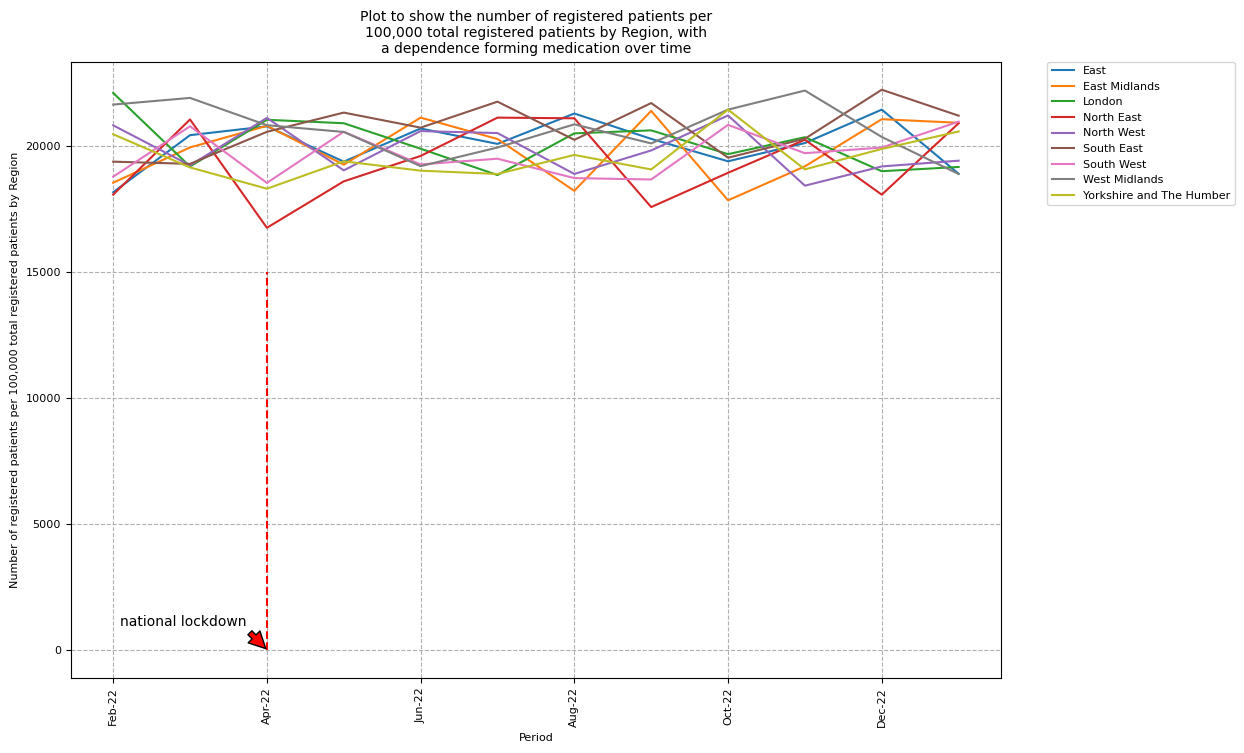

In [7]:
df_temp = pd.DataFrame(data_measure_dfm_medications_region_rate)
df_region_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_region_research_population = pd.DataFrame.pivot(df_region_research_population, index='date', columns='region', values='weighted_research_population')
df_region_research_population.index = pd.to_datetime(df_region_research_population.index).strftime('%b-%y')
ax = df_region_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=15000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients per 100,000 total registered patients by Region, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [8]:
print(tabulate(df_region_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_region_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22  18164.3          18542.3   22105.8       18067.6       20820.2       19377.5       18780.7          21643.3                     20465.6
date       East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23  18897.6          20920.9   19167.1       20902.8       19416.5       21202.5       20964.6          18887.8                     20576.1


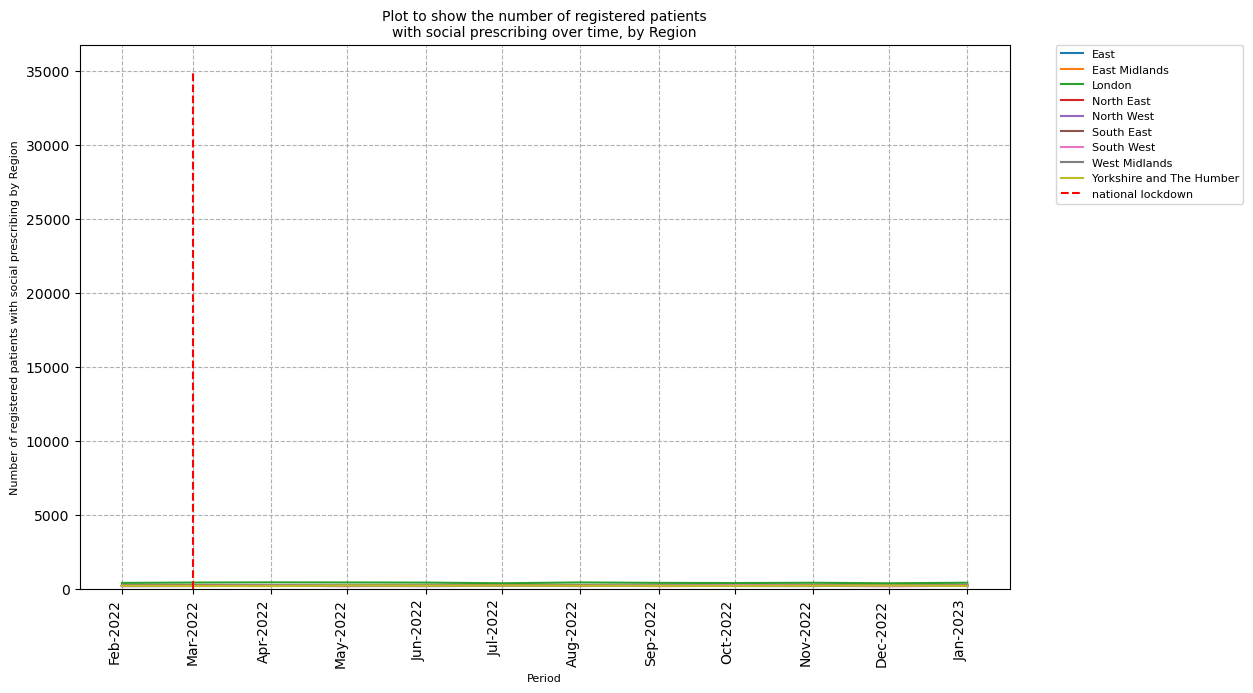

In [9]:
data_measure_social_prescribing_region_rate = pd.read_csv("../output/measure_compare_medications_by_region_socialrx_v_consultation_rate.csv", usecols=["date", "region", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_social_prescribing_region_rate = data_measure_social_prescribing_region_rate.loc[data_measure_social_prescribing_region_rate["region"] != "nan", :]
data_measure_social_prescribing_region_rate = data_measure_social_prescribing_region_rate.loc[data_measure_social_prescribing_region_rate["with_social_prescribing"] == 1, :]
df = pd.DataFrame(data=data_measure_social_prescribing_region_rate)
df2 = df.groupby(['date', 'region']).population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients with social prescribing by Region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=35000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients with social prescribing over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_region_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [10]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00     229              206       393           198           169           196           193              217                         199
date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00     199              183       404           222           196           193           202              206                         195


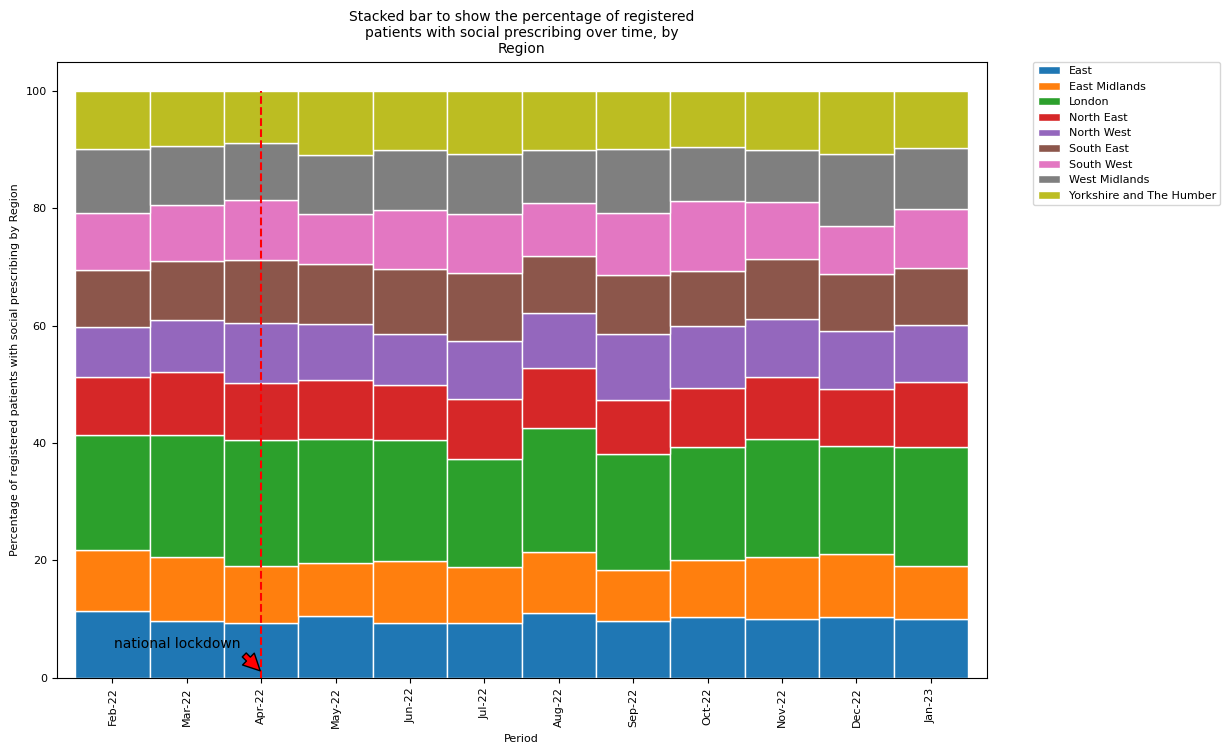

In [11]:
df_region_social_stacked = pd.DataFrame(df2)
df_region_social_stacked.head()
df_region_social_stacked.index = pd.to_datetime(df_region_social_stacked.index).strftime('%b-%y')
totrs = df_region_social_stacked.sum(axis=1)
perrs = df_region_social_stacked.div(totrs, axis=0).mul(100).round(2)
ax = perrs.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients with social prescribing by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients with social prescribing over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_region_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [12]:
print(tabulate(perrs.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrs.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22   11.45             10.3     19.65           9.9          8.45           9.8          9.65            10.85                        9.95
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23    9.95             9.15      20.2          11.1           9.8          9.65          10.1             10.3                        9.75


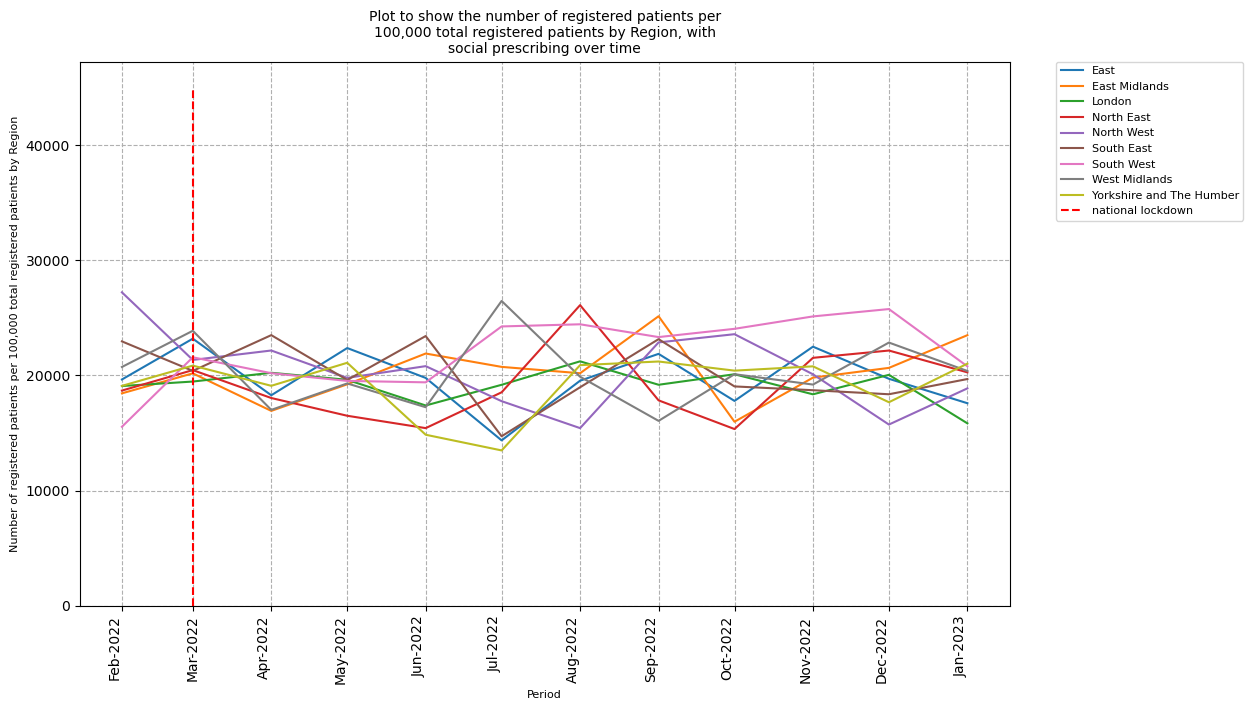

In [13]:
df1 = df.assign(weighted_population=lambda x: x.population / 100000)
df2 = df1.groupby(['date', 'region']).research_population.sum().unstack() / df1.groupby(['date', 'region']).weighted_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by Region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=45000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by Region, with social prescribing over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_region_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [14]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00  19650.7          18446.6     19084       18686.9       27218.9       22959.2         15544          20737.3                     19095.5
date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00  17587.9          23497.3   15841.6       20270.3       18877.6       19689.1       20792.1          20388.3                     21025.6


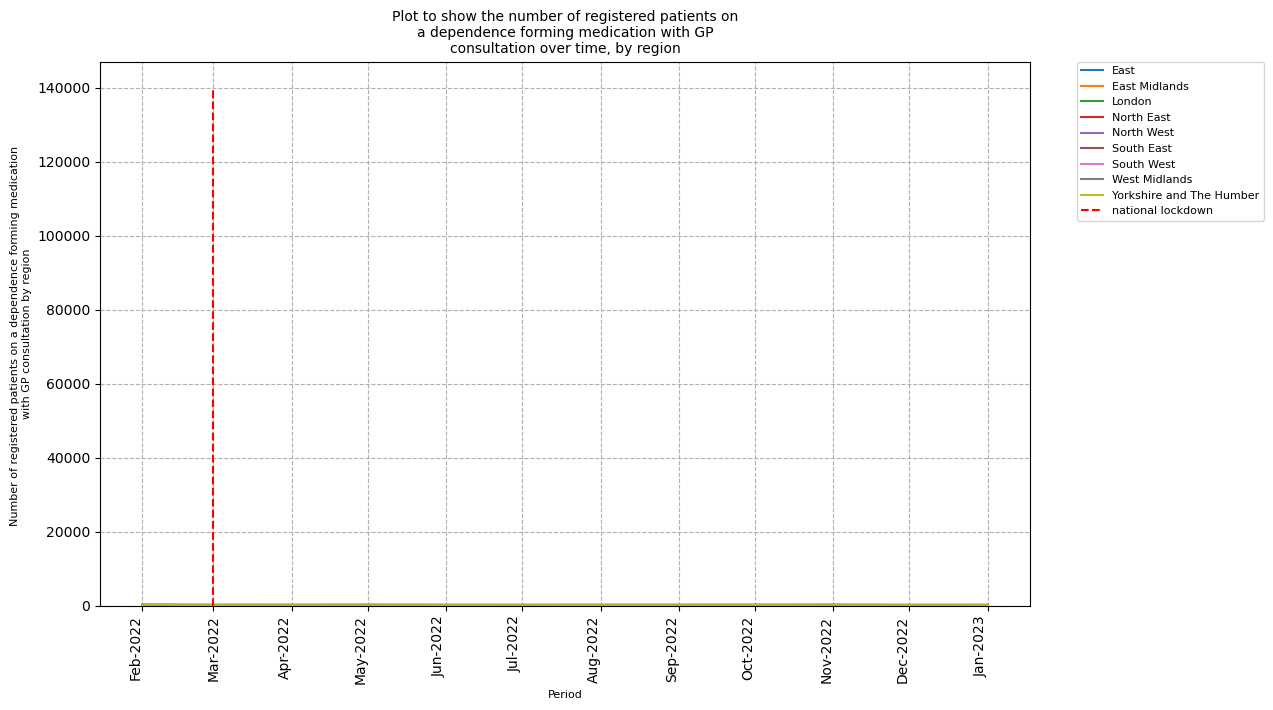

In [15]:
data_measure_consultation_region_rate = pd.read_csv("../output/measure_compare_medications_by_region_socialrx_v_consultation_rate.csv", usecols=["date", "region", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_consultation_region_rate = data_measure_consultation_region_rate.loc[data_measure_consultation_region_rate["region"] != "nan", :]
data_measure_consultation_region_rate = data_measure_consultation_region_rate.loc[data_measure_consultation_region_rate["with_consultation"] == 1, :]
df = pd.DataFrame(data=data_measure_consultation_region_rate)
df2 = df.groupby(['date', 'region']).research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nwith GP consultation by region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=140000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_region_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [16]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00     138              128       348           145           156           136           140              167                         161
date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00     152              153       289           148           144           141           170              149                         148


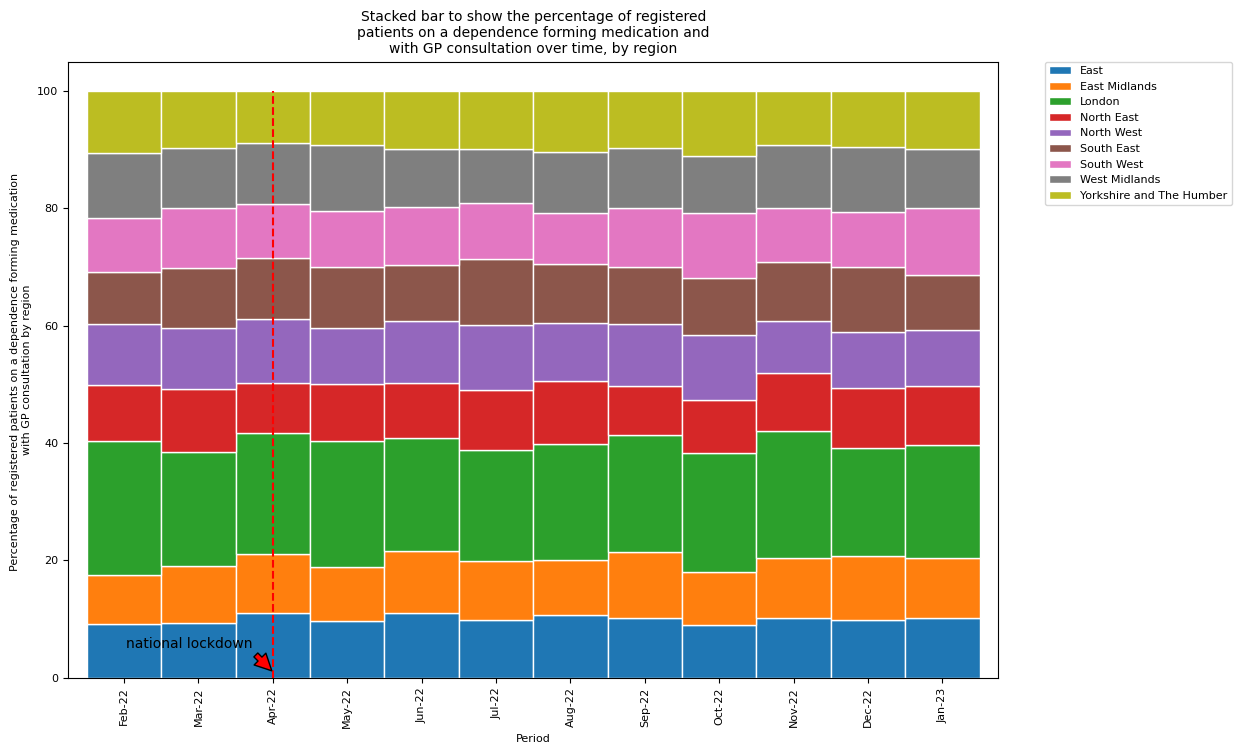

In [17]:
df_region_consult_stacked = pd.DataFrame(df2)
df_region_consult_stacked.head()
df_region_consult_stacked.index = pd.to_datetime(df_region_consult_stacked.index).strftime('%b-%y')
totrc = df_region_consult_stacked.sum(axis=1)
perrc = df_region_consult_stacked.div(totrc, axis=0).mul(100).round(2)
ax = perrc.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith GP consultation by region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_gp_consultation_region_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [18]:
print(tabulate(perrc.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrc.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22    9.08             8.43     22.91          9.55         10.27          8.95          9.22            10.99                        10.6
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Jan-23   10.17            10.24     19.34          9.91          9.64          9.44         11.38             9.97                        9.91


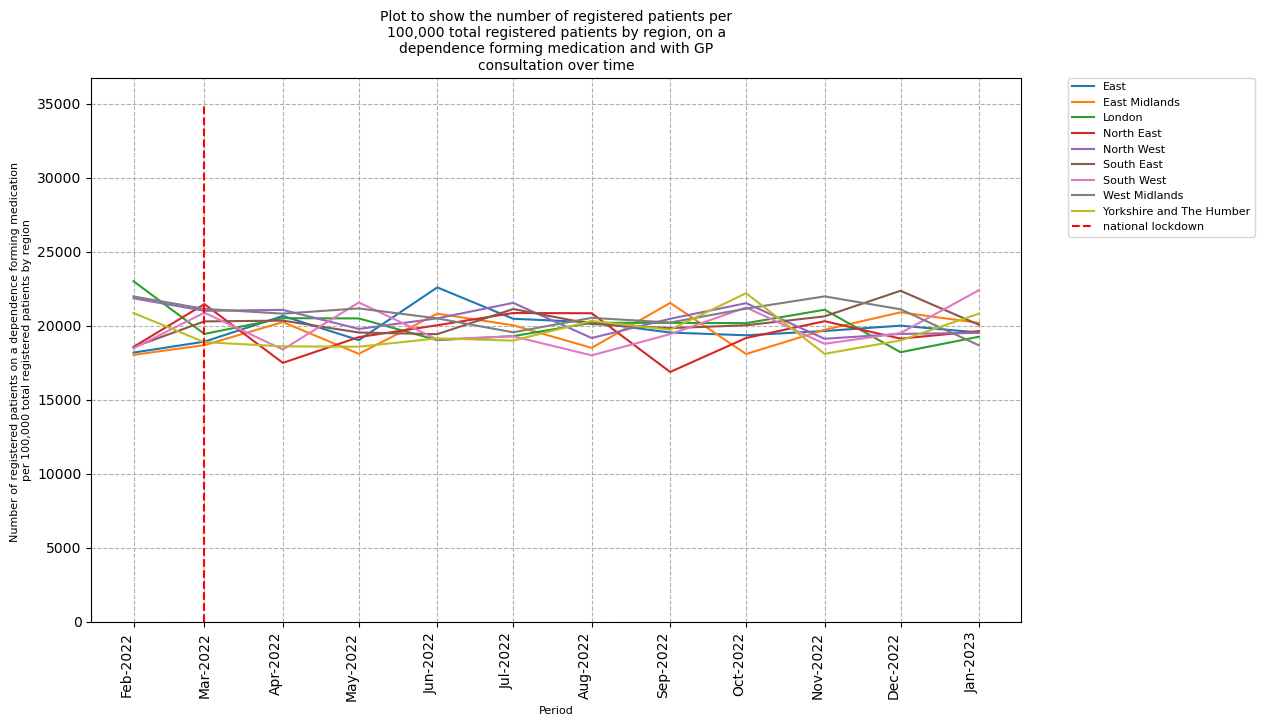

In [19]:
df1 = df.assign(weighted_population=lambda x: x.population / 100000)
df2 = df1.groupby(['date', 'region']).research_population.sum().unstack() / df1.groupby(['date', 'region']).weighted_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nper 100,000 total registered patients by region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=35000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by region, on a dependence forming medication and with GP consultation over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_region_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [20]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00  18181.8          18028.2   23000.7       18565.9       21848.7       18553.9       18469.7          21973.7                     20854.9
date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-01-01 00:00:00  19537.3          20184.7   19253.8       19628.6       19512.2       20056.9       22397.9          18671.7                     20815.8
